# 2 데이터 다루기
## 2-2 데이터 전처리

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
import numpy as np

In [4]:
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [5]:
fish_data = np.column_stack((fish_length,fish_weight))

In [6]:
fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [7]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [8]:
fish_target = np.concatenate((np.ones(35),np.zeros(14)))

In [9]:
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data,
                                                                      fish_target,
                                                                      random_state=42)

In [12]:
print(train_input.shape,test_input.shape)

(36, 2) (13, 2)


In [13]:
print(train_target.shape,test_target.shape)

(36,) (13,)


In [14]:
test_target
# 빙어의 데이터가 적은것 같다.

array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [15]:
train_input, test_input, train_target, test_target = train_test_split(fish_data,
                                                                      fish_target,
                                                                      stratify=fish_target,
                                                                      random_state=42)

In [16]:
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [17]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

1.0

In [18]:
print(kn.predict([[25,150]]))

[0.]


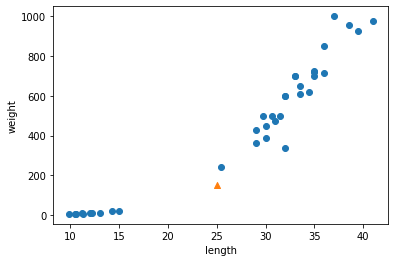

In [19]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [20]:
distances, indexes = kn.kneighbors([[25,150]])

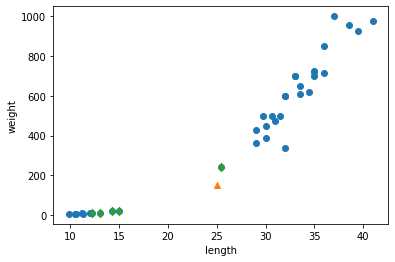

In [21]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='d')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [22]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [23]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [24]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


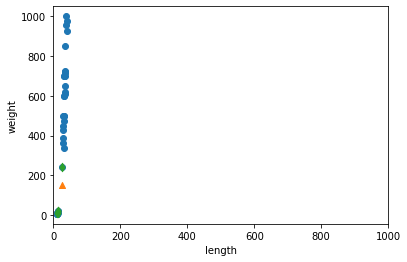

In [25]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='d')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [26]:
mean = np.mean(train_input,axis=0)
std = np.std(train_input,axis=0)

In [28]:
print(mean,std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [29]:
train_scaled = (train_input-mean)/std

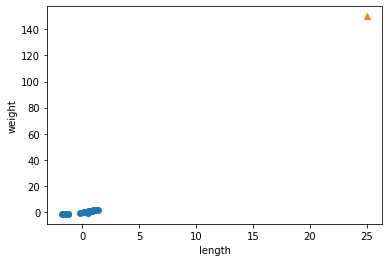

In [31]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

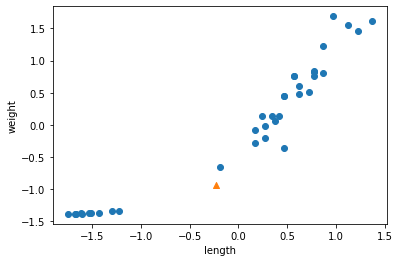

In [33]:
new = ([25,150]-mean)/std
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [34]:
kn.fit(train_scaled,train_target)

KNeighborsClassifier()

In [35]:
test_scaled = (test_input - mean) / std

In [36]:
kn.score(test_scaled,test_target)

1.0

In [37]:
kn.predict([new])

array([1.])

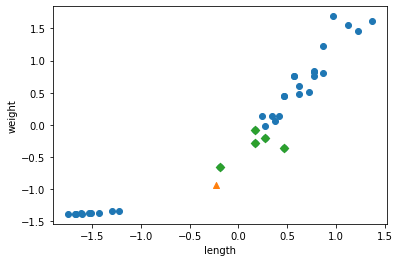

In [38]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()